In [59]:
import torch
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from torch import nn, optim
from torchvision.models import vgg19

In [18]:
def rgb(img):
    b,g,r = cv2.split(img)
    return cv2.merge([r,g,b])

<Figure size 720x720 with 0 Axes>

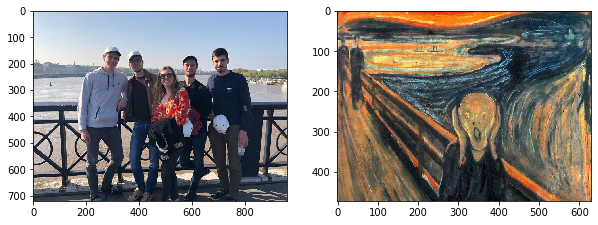

In [119]:
plt.figure(figsize=(10,10))

content = rgb(cv2.imread('./data/input.jpg').astype('uint8'))
style   = rgb(cv2.imread('./data/cri.png').astype('uint8'))


fig, axs = plt.subplots(1, 2, figsize = (10, 10))

axs[0].imshow(content)
axs[1].imshow(style)


In [1]:
def gram(x):
    a, b, c, d = x.size()
    features   = x.view(a * b, c * d)
    return torch.mm(features, features.t())

In [ ]:
class Content_loss(torch.nn.Module):
    def __init__(self, initial):
        super(Content_loss, self).__init__()
        self.initial = initial.detach()
        
    def forward(x):
        self.loss = (x - self.initial)**2
        self.loss = torch.sum(self.loss)
        return x

In [ ]:
class Style_loss(torch.nn.Module):
    def __init__(self, style):
        super(Style_loss, self).__init__()
        self.initial = st.detach()
        
    def forward(x):
        self.loss = (x - self.initial)**2
        self.loss = torch.sum(self.loss)
        return x

In [109]:
class Vgg19(torch.nn.Module):
    def __init__(self):
        super(Vgg19, self).__init__()
        features = list(vgg19(pretrained = True).features)[:]
        self.features = nn.ModuleList(features).eval() 
        
    def forward(self, x):
        idx_conv = [0, 5, 10, 19, 28, 29]
        results = []
        for ii, model in enumerate(self.features):
            x = model(x)
            if ii in idx_conv:
                results.append(x)
        
        return results

In [100]:
def gram(input_tensor):
    channels = int(input_tensor.shape[-1])
    a = input_tensor.view([-1, channels])
    b = a.transpose(0, 1)
    n = a.shape[0]
    gram = torch.matmul(a, b)
    return gram / torch.tensor(n).float()

In [175]:
def get_features(model, content, style):
    data    = torch.tensor([content, style])
    output  = model(data.float())
    
    style   = [style_layer[1] for style_layer in output[:-1]]
    content = [content_layer[0] for content_layer in output[-1:]]
    
    return style, content

In [82]:
criterion = torch.nn.MSELoss()

In [110]:
model = Vgg19()

In [120]:
style     = cv2.resize(style, (224, 224))
style     = np.moveaxis(style, 2, 0)
content   = cv2.resize(content, (224, 224))
content   = np.moveaxis(content, 2, 0)
t_style   = torch.tensor([style])
t_content = torch.tensor([content])

In [116]:
with torch.no_grad():
    style_out   = model(t_style.float())
    content_out = model(t_content.float())

In [176]:
out = get_features(model, content, style)

In [177]:
len(style_out[:-1]) == len(out[0])

True

In [205]:
style_out[3][0, 1, 9, -9].item() == out[0][3][1, 9, -9].item()

True

In [180]:
len(content_out[-1:]) == len(out[1])

True

In [199]:
out[1][0][0, 1, 1].item() == content_out[-1][0][0, 1, 1].item()

True